In [10]:
import numpy as np
import csv
# from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from model import Network, SimpleNET, ResNet
from config.baseline_config import *
from augmentation import transforms_0
from train import train

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
trainset = datasets.ImageFolder('/dtu/datasets1/02514/hotdog_nothotdog/train', transform=transforms_0)
train_loader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=1)

testset = datasets.ImageFolder('/dtu/datasets1/02514/hotdog_nothotdog/test', transform=transforms_0)
test_loader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=1)

In [11]:
model = ResNet(3, 8)
model.to(device)

# Save the initial parameters so all optimizers work on the same network
init_param = model.state_dict()
model.load_state_dict(init_param)

loss = nn.BCELoss()
optim_sgd = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum = 0.9)
optim_adam = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
optim_adagrad = torch.optim.Adagrad(model.parameters(), lr=LEARNING_RATE)
optim_adadelta = torch.optim.Adadelta(model.parameters())
# lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=DECAY_RATE)

In [12]:
result_dicts = []
for optimizer in [optim_sgd, optim_adam, optim_adagrad, optim_adadelta]:
    print(f"Training with {optimizer}")
    result_dicts.append(train(model, train_loader, test_loader, loss, optimizer, NUM_EPOCHS))
    model.load_state_dict(init_param)
    

Training with SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


  0%|          | 0/20 [00:00<?, ?epoch/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.706	 test: 0.692	 Accuracy train: 49.5%	 test: 51.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.699	 test: 0.693	 Accuracy train: 51.9%	 test: 51.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.702	 test: 0.693	 Accuracy train: 48.6%	 test: 51.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.701	 test: 0.695	 Accuracy train: 47.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.698	 test: 0.693	 Accuracy train: 49.0%	 test: 51.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.696	 test: 0.693	 Accuracy train: 49.7%	 test: 51.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.696	 test: 0.693	 Accuracy train: 48.3%	 test: 48.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.694	 Accuracy train: 51.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.695	 test: 0.693	 Accuracy train: 49.7%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.694	 test: 0.694	 Accuracy train: 50.0%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.695	 test: 0.694	 Accuracy train: 48.9%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.695	 Accuracy train: 53.4%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.695	 Accuracy train: 50.6%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.695	 Accuracy train: 51.4%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.695	 Accuracy train: 50.6%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.696	 Accuracy train: 51.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.696	 Accuracy train: 52.4%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.696	 Accuracy train: 52.0%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.696	 Accuracy train: 51.7%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.696	 Accuracy train: 52.1%	 test: 48.1%
Training with Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


  0%|          | 0/20 [00:00<?, ?epoch/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.693	 Accuracy train: 51.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.696	 Accuracy train: 52.4%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.694	 test: 0.697	 Accuracy train: 52.5%	 test: 48.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.699	 test: 0.692	 Accuracy train: 51.1%	 test: 51.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.682	 test: 0.662	 Accuracy train: 57.4%	 test: 59.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.668	 test: 0.665	 Accuracy train: 60.8%	 test: 60.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.649	 test: 0.636	 Accuracy train: 63.3%	 test: 66.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.632	 test: 0.615	 Accuracy train: 64.1%	 test: 67.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.621	 test: 0.605	 Accuracy train: 65.1%	 test: 67.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.607	 test: 0.605	 Accuracy train: 67.7%	 test: 67.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.593	 test: 0.587	 Accuracy train: 69.4%	 test: 70.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.577	 test: 0.665	 Accuracy train: 70.8%	 test: 61.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.571	 test: 0.624	 Accuracy train: 70.7%	 test: 66.7%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.529	 test: 0.590	 Accuracy train: 74.7%	 test: 68.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.479	 test: 0.625	 Accuracy train: 79.7%	 test: 65.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.410	 test: 0.612	 Accuracy train: 83.4%	 test: 66.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.343	 test: 0.609	 Accuracy train: 87.9%	 test: 68.7%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.276	 test: 0.623	 Accuracy train: 91.5%	 test: 69.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.234	 test: 0.691	 Accuracy train: 93.1%	 test: 63.7%
Training with Adagrad (
Parameter Group 0
    differentiable: False
    eps: 1e-10
    foreach: None
    initial_accumulator_value: 0
    lr: 0.001
    lr_decay: 0
    maximize: False
    weight_decay: 0
)


  0%|          | 0/20 [00:00<?, ?epoch/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.200	 test: 0.684	 Accuracy train: 94.5%	 test: 66.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.188	 test: 0.686	 Accuracy train: 95.1%	 test: 66.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.182	 test: 0.698	 Accuracy train: 95.1%	 test: 66.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.174	 test: 0.702	 Accuracy train: 95.7%	 test: 66.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.164	 test: 0.692	 Accuracy train: 96.3%	 test: 66.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.174	 test: 0.702	 Accuracy train: 95.6%	 test: 66.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.169	 test: 0.692	 Accuracy train: 95.8%	 test: 67.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.169	 test: 0.711	 Accuracy train: 95.4%	 test: 66.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.154	 test: 0.703	 Accuracy train: 96.3%	 test: 67.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.160	 test: 0.705	 Accuracy train: 96.4%	 test: 66.7%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.153	 test: 0.708	 Accuracy train: 96.8%	 test: 66.7%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.159	 test: 0.708	 Accuracy train: 96.3%	 test: 67.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.148	 test: 0.704	 Accuracy train: 96.7%	 test: 66.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.149	 test: 0.712	 Accuracy train: 96.5%	 test: 67.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.154	 test: 0.710	 Accuracy train: 95.9%	 test: 66.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.147	 test: 0.716	 Accuracy train: 96.8%	 test: 67.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.144	 test: 0.727	 Accuracy train: 96.7%	 test: 66.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.141	 test: 0.727	 Accuracy train: 96.7%	 test: 66.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.142	 test: 0.722	 Accuracy train: 96.5%	 test: 66.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.139	 test: 0.720	 Accuracy train: 96.8%	 test: 67.0%
Training with Adadelta (
Parameter Group 0
    differentiable: False
    eps: 1e-06
    foreach: None
    lr: 1.0
    maximize: False
    rho: 0.9
    weight_decay: 0
)


  0%|          | 0/20 [00:00<?, ?epoch/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.190	 test: 0.906	 Accuracy train: 94.1%	 test: 60.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.132	 test: 1.113	 Accuracy train: 96.0%	 test: 64.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.119	 test: 0.901	 Accuracy train: 96.3%	 test: 62.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.096	 test: 1.182	 Accuracy train: 97.3%	 test: 58.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.094	 test: 1.379	 Accuracy train: 97.1%	 test: 66.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.080	 test: 1.173	 Accuracy train: 97.4%	 test: 62.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.085	 test: 1.277	 Accuracy train: 97.5%	 test: 63.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.069	 test: 1.307	 Accuracy train: 98.1%	 test: 63.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.079	 test: 1.340	 Accuracy train: 97.4%	 test: 58.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.071	 test: 1.204	 Accuracy train: 98.0%	 test: 62.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.039	 test: 2.501	 Accuracy train: 98.9%	 test: 65.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.047	 test: 2.180	 Accuracy train: 98.7%	 test: 64.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.060	 test: 1.445	 Accuracy train: 98.1%	 test: 64.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.049	 test: 1.544	 Accuracy train: 98.4%	 test: 60.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.048	 test: 1.864	 Accuracy train: 98.3%	 test: 63.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.035	 test: 1.940	 Accuracy train: 99.3%	 test: 63.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.057	 test: 1.499	 Accuracy train: 98.6%	 test: 59.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.030	 test: 2.206	 Accuracy train: 99.3%	 test: 62.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.045	 test: 2.800	 Accuracy train: 98.6%	 test: 63.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.028	 test: 2.815	 Accuracy train: 99.0%	 test: 64.6%


In [14]:
# saving results
optim_names = ["SGD", "Adam", "Adagrad", "Adadelta"]
for i, optim_dict in enumerate(result_dicts):
    d = optim_dict
    with open(f'results/{"ResNet"}/{NUM_EPOCHS}_epochs_{LEARNING_RATE:.0e}_lr_{optim_names[i]}_optim.csv', 'w') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerow(d.keys())
        writer.writerows(zip(*d.values()))

NameError: name 'MODEL_NAME' is not defined

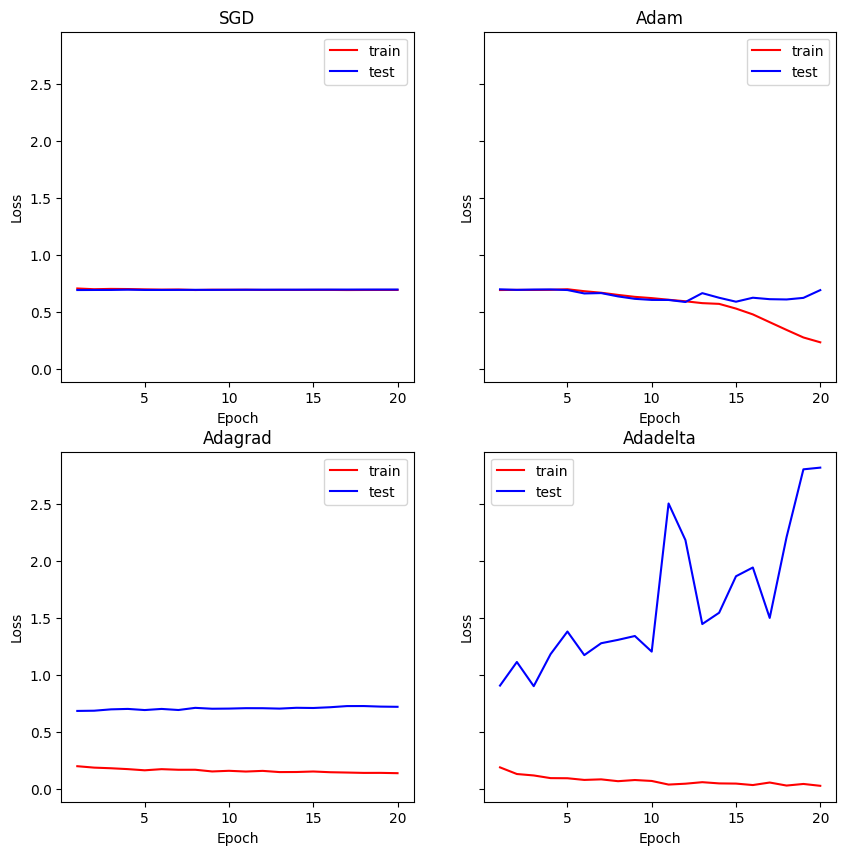

In [18]:
i = 0
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 10), sharey=True)
axs = [ax1, ax2, ax3, ax4]
for i, optim_dict in enumerate(result_dicts):
    axs[i].plot([e for e in range(1, NUM_EPOCHS+1)], optim_dict['train_loss'], c='r', label='train')
    axs[i].plot([e for e in range(1, NUM_EPOCHS+1)], optim_dict['test_loss'], c='b', label='test')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('Loss')
    axs[i].set_title(optim_names[i])
    axs[i].legend()


plt.show()